# Artificial Neural Network using Keras
Titanic <br>
Damien Park

---

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import *
from keras.initializers import *

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

from itertools import chain

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../input/train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Dictionary

|Variable|Definition|Key|
|----------|-----------|:---:|
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex|Male and Female|
|Age|Age in years|-|
|Sibsp|# of siblings / spouses aboard the Titanic|-|
|Parch|# of parents / children aboard the Titanic|-|
|Ticket|Ticket number|-|
|Fare|Passenger fare|-|
|Cabin|Cabin number|-|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

---

## 1. Data Preprocessing

## Fare

In [3]:
df.query("Fare == 0").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


There are a few recode which Fare is zero.
I think it is error

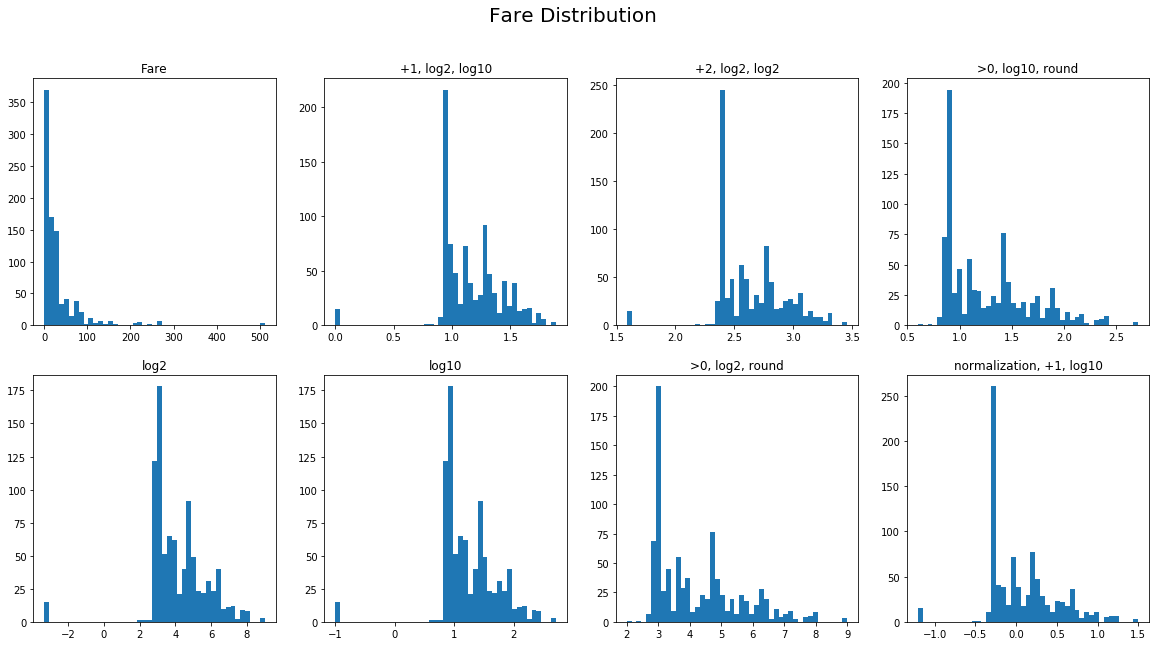

In [4]:
plt.figure(figsize=(20,10))
plt.suptitle("Fare Distribution", size=20)

plt.subplot(2, 4, 1)
plt.title("Fare")
plt.hist(df.Fare, bins=45)

plt.subplot(2, 4, 2)
plt.title("+1, log2, log10")
plt.hist(np.log2(np.log10(df.Fare + 1) + 1), bins=45)

plt.subplot(2, 4, 3)
plt.title("+2, log2, log2")
plt.hist(np.log2(np.log2(df.Fare + 2) + 2), bins=45)

plt.subplot(2, 4, 4)
plt.title(">0, log10, round")
plt.hist(np.round(np.log10(df.query("Fare > 0").Fare), 2), bins=45)

plt.subplot(2, 4, 5)
plt.title("log2")
plt.hist(np.log2(df.Fare + 0.1), bins=45)

plt.subplot(2, 4, 6)
plt.title("log10")
plt.hist(np.log10(df.Fare + 0.1), bins=45)

plt.subplot(2, 4, 7)
plt.title(">0, log2, round")
plt.hist(np.round(np.log2(df.query("Fare > 0").Fare), 2), bins=45)

plt.subplot(2, 4, 8)
plt.title("normalization, +1, log10")
plt.hist(np.log10((df.Fare + 1 - df.Fare.min())/df.Fare.max()) +1.5, bins=45)
plt.show()


In [5]:
np.mean(df.Fare), np.std(df.Fare)

(32.2042079685746, 49.66553444477411)

In [6]:
mean_fare = np.mean(df.Fare)
df.loc[df.Fare == 0, "Fare"] = mean_fare

In [7]:
# Fare normalization
#for i in range(len(df.Fare)):
#    df.loc[i, "nor_Fare"] = np.log10(np.abs((df.Fare[i]+0.1-np.mean(df.Fare)))/np.std(df.Fare))

# Fare normalization
#df["nor_Fare"] = (df.Fare - np.mean(df.Fare)) / np.std(df.Fare)

# # Fare normalization by Pclass
# for i in np.unique(df.Pclass):
#     df.loc[df.Pclass == i, "nor_Fare"] = (df.loc[df.Pclass == i, "Fare"] - np.min(df.loc[df.Pclass == i, "Fare"])) / (np.max(df.loc[df.Pclass == i, "Fare"]) - np.min(df.loc[df.Pclass == i, "Fare"]))

# Fare standardization by Pclass
# for i in np.unique(df.Pclass):
#     df.loc[df.Pclass == i, "nor_Fare"] = (df[df.Pclass == i]["Fare"] - np.mean(df[df.Pclass == i]["Fare"])) / np.std(df[df.Pclass == i]["Fare"])

In [8]:
# plt.hist(df.nor_Fare, bins=45)
# plt.show()

In [9]:
# df.Fare = np.log10((df.Fare + 1 - df.Fare.min())/df.Fare.max()) +1.5

In [10]:
# for idx, value in enumerate(df.Fare):
#     if value != 0:
#         df.loc[idx, "Fare"] = np.round(np.log10(value), 2)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Encoding
Sex(One-Hot-Encoding) <br>
Pclass(Label Encoding) <br>
Embarked(Label Encoding)

In [12]:
# Sex Encoding
binar = LabelBinarizer().fit(df.loc[:, "Sex"])
df["Sex"] = binar.transform(df["Sex"])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Pclass Encoding
# df_Pclass = pd.DataFrame(OneHotEncoder().fit_transform(np.array(df["Pclass"])[:,np.newaxis]).toarray(), columns=["A_Class", "B_Class", "C_Class"])
# df_Pclass = df_Pclass.astype(int)
# df_Pclass.head()

In [14]:
# Pclass Encoding
df["A_Class"] = 0
df["B_Class"] = 0
df["C_Class"] = 0

df.loc[df.Pclass == 1, "A_Class"] = 1
df.loc[df.Pclass == 2, "B_Class"] = 1
df.loc[df.Pclass == 3, "C_Class"] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A_Class,B_Class,C_Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [15]:
# Embarked Encoding
df_Embarked = pd.get_dummies(df.Embarked)
df_Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


## Interpolation for Age

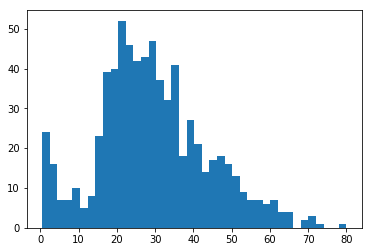

In [16]:
plt.hist(df.query("Age>0").Age, bins=40)
plt.show()

In [17]:
df.Age.isna().sum()

177

In [18]:
df.Age[df.Age.notna()][df.Age[df.Age.notna()] % 1 != 0].head()

57     28.50
78      0.83
111    14.50
116    70.50
122    32.50
Name: Age, dtype: float64

Age is not integer

In [19]:
# Nan Age is fill using average age
#df.loc[:, "Age"].fillna(int(df["Age"].mean()), inplace=True)
#df.loc[:, "Age"].fillna(int(df["Age"].median()), inplace=True)

#df.query("Sex == 'male' & Age == 'Nan'").fillna(30, inplace=True)
#df.query("Sex == 'female' & Age == 'Nan'").fillna(28, inplace=True)

In [20]:
df.groupby(["Sex", "Pclass"]).Age.mean()

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [21]:
# df.loc[:, "Age"].fillna(0, inplace=True)

# for idx, value in enumerate(df.Age):
#     if value == 0:
#         if df.Sex[idx] == 1:
#             df.Age[idx] = 30.7
#         else:
#             df.Age[idx] = 27.9

In [22]:
df.loc[(df.Sex == 0) & (df.Age.isna()) & (df.Pclass == 1), "Age"] = 34.6
df.loc[(df.Sex == 0) & (df.Age.isna()) & (df.Pclass == 2), "Age"] = 28.7
df.loc[(df.Sex == 0) & (df.Age.isna()) & (df.Pclass == 3), "Age"] = 21.7

df.loc[(df.Sex == 1) & (df.Age.isna()) & (df.Pclass == 1), "Age"] = 41.2
df.loc[(df.Sex == 1) & (df.Age.isna()) & (df.Pclass == 2), "Age"] = 30.7
df.loc[(df.Sex == 1) & (df.Age.isna()) & (df.Pclass == 3), "Age"] = 26.5

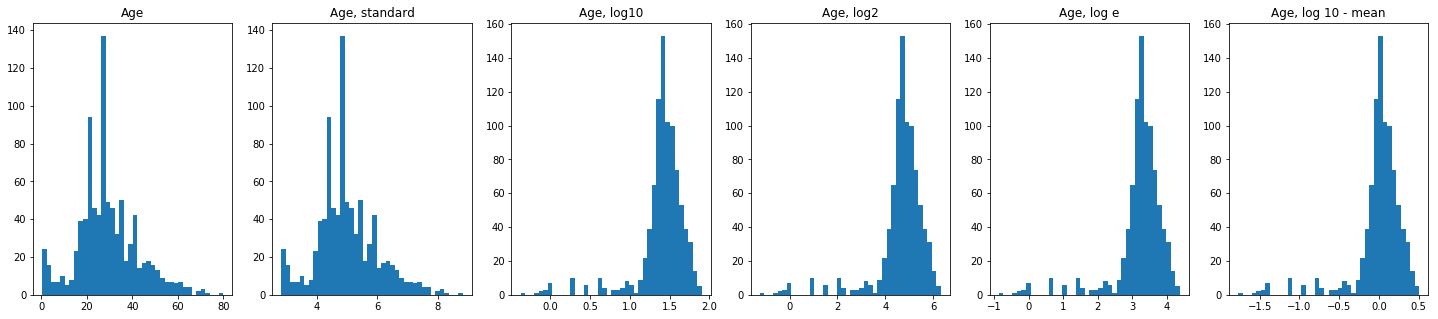

In [23]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 6, 1)
plt.title("Age")
plt.hist(df.Age, bins=40)
plt.subplot(1, 6, 2)
plt.title("Age, standard")
plt.hist((df.Age-np.mean(df.Age))/np.std(df.Age)+5, bins=40)
plt.subplot(1, 6, 3)
plt.title("Age, log10")
plt.hist(np.log10(df.Age), bins=40)
plt.subplot(1, 6, 4)
plt.title("Age, log2")
plt.hist(np.log2(df.Age), bins=40)
plt.subplot(1, 6, 5)
plt.title("Age, log e")
plt.hist(np.log(df.Age), bins=40)
plt.subplot(1, 6, 6)
plt.title("Age, log 10 - mean")
plt.hist(np.log10(df.Age)-np.mean(np.log10(df.Age)), bins=40)

plt.show()

In [24]:
#df.Age = np.log10(df.Age) - np.mean(np.log10(df.Age))

# for i in pd.unique(df.Sex):
#     for j in pd.unique(df.Pclass):
#         df.loc[(df.Sex == i) & (df.Pclass == j), "Age"] = (df.loc[(df.Sex == i) & (df.Pclass == j), "Age"] - np.min(df.loc[(df.Sex == i) & (df.Pclass == j), "Age"])) / (np.max(df.loc[(df.Sex == i) & (df.Pclass == j), "Age"]) - np.min(df.loc[(df.Sex == i) & (df.Pclass == j), "Age"]))

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A_Class,B_Class,C_Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,26.5,0,0,330877,8.4583,NaN,Q,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0,1,0


## New columes
Boarding Together or Alone

In [26]:
# Boarding Together or Alone
for i in range(len(df)):
    if df.loc[i, "SibSp"] + df.loc[i, "Parch"] == 0:
        df.loc[i, "Alone"] = 1
    else:
        df.loc[i, "Alone"] = 0

df.Alone = df.Alone.astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A_Class,B_Class,C_Class,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1


## Data Marge

In [27]:
df_new = pd.concat([df, df_Embarked], axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A_Class,B_Class,C_Class,Alone,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1,0,0,1


In [28]:
#feature_name = ["Sex", "Age", "Fare", "Alone", "A_Class", "B_Class", "C_Class", "C", "Q", "S"]
feature_name = ["Sex", "Age", "Fare", "Alone", "A_Class", "B_Class", "C_Class", "C", "Q", "S", "SibSp", "Parch"]

dfX = df_new[feature_name]
dfY = df_new["Survived"]

## MinMaxScale

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(dfX)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
dfX = scaler.transform(dfX)

In [32]:
dfX = pd.DataFrame(dfX, columns=feature_name)

In [33]:
dfX.head()

,Sex,Age,Fare,Alone,A_Class,B_Class,C_Class,C,Q,S,SibSp,Parch
0,1.0,0.271174,0.006369,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.125,0.0
1,0.0,0.472229,0.132340,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.125,0.0
2,0.0,0.321438,0.007697,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.0
3,0.0,0.434531,0.096569,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.125,0.0
4,1.0,0.434531,0.007943,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.0


## Split data(train, test)

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=1)
#X_train, X_test, y_train, y_test

---

## 2. Set Artifial neural network and Learning
multi layers

In [35]:
df.Survived.sum() / len(df)

0.3838383838383838

In [36]:
model = Sequential()

model.add(Dense(32, input_dim=12, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(32, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=["binary_accuracy"])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [38]:
# keras.backend.reset_uids()

In [39]:
model_result = model.fit(dfX, dfY, batch_size=100, epochs=200, validation_split=0.2, shuffle=True, verbose=2)

Train on 712 samples, validate on 179 samples
Epoch 1/200
 - 1s - loss: 1.1353 - binary_accuracy: 0.5520 - val_loss: 0.6151 - val_binary_accuracy: 0.6480
Epoch 2/200
 - 0s - loss: 0.7442 - binary_accuracy: 0.6348 - val_loss: 0.4786 - val_binary_accuracy: 0.8156
Epoch 3/200
 - 0s - loss: 0.7204 - binary_accuracy: 0.6404 - val_loss: 0.4829 - val_binary_accuracy: 0.8045
Epoch 4/200
 - 0s - loss: 0.6610 - binary_accuracy: 0.6812 - val_loss: 0.4681 - val_binary_accuracy: 0.8268
Epoch 5/200
 - 0s - loss: 0.6307 - binary_accuracy: 0.7149 - val_loss: 0.4970 - val_binary_accuracy: 0.7765
Epoch 6/200
 - 0s - loss: 0.6517 - binary_accuracy: 0.6685 - val_loss: 0.4864 - val_binary_accuracy: 0.7765
Epoch 7/200
 - 0s - loss: 0.6221 - binary_accuracy: 0.7079 - val_loss: 0.4588 - val_binary_accuracy: 0.7933
Epoch 8/200
 - 0s - loss: 0.6188 - binary_accuracy: 0.7093 - val_loss: 0.4483 - val_binary_accuracy: 0.7877
Epoch 9/200
 - 0s - loss: 0.6401 - binary_accuracy: 0.6994 - val_loss: 0.4473 - val_binary

## Result

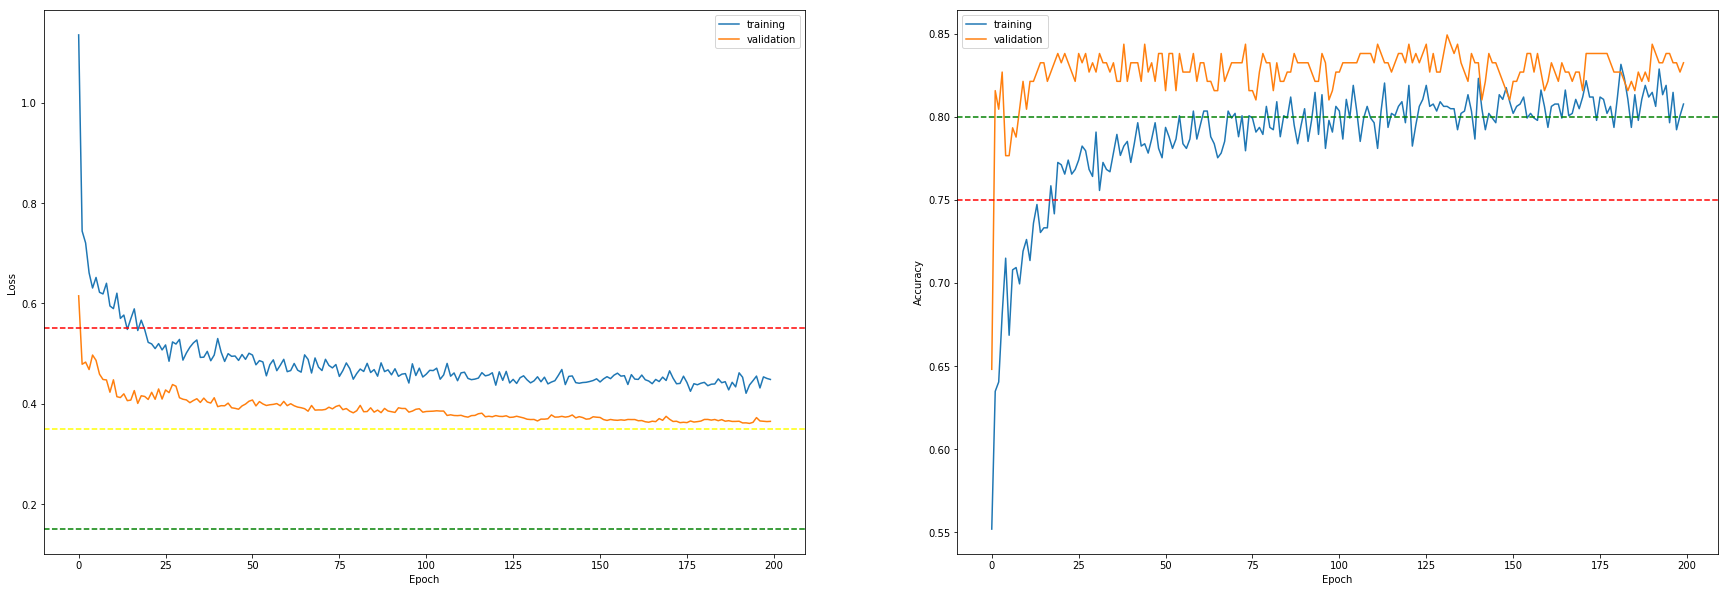

In [40]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(model_result.history["loss"], label="training")
plt.plot(model_result.history["val_loss"], label="validation")
plt.axhline(0.55, c="red", linestyle="--")
plt.axhline(0.35, c="yellow", linestyle="--")
plt.axhline(0.15, c="green", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_result.history["binary_accuracy"], label="training")
plt.plot(model_result.history["val_binary_accuracy"], label="validation")
plt.axhline(0.75, c="red", linestyle="--")
plt.axhline(0.80, c="green", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [41]:
#y_predict = model.predict_classes(X_test.values)

In [42]:
#print(classification_report(y_test, y_predict))

---

## 3. Predict_OUTPUT

In [43]:
test = pd.read_csv("../input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
# Log Fare
# for idx, value in enumerate(test.Fare):
#     if value != 0:
#         test.loc[idx, "Fare"] =  np.round(np.log10(value), 2)
# test.Fare = np.log10((test.Fare + 1 - test.Fare.min())/test.Fare.max()) +1.5
# for i in range(len(test.Fare)):
#     test.loc[i, "nor_Fare"] = (test.Fare[i]-np.mean(test.Fare))/np.std(test.Fare)

# # fare
# #for i in range(len(test.Fare)):
# #    test.loc[i, "nor_Fare"] = np.log10(np.abs((test.Fare[i]+0.1-np.mean(test.Fare)))/np.std(test.Fare))
# #test.Fare = test.nor_Fare

# #test.nor_Fare = (test.Fare - np.mean(test.Fare)) / test.std(df.Fare)
# #test.Fare = test.nor_Fare

# # for i in np.unique(test.Pclass):
# #     test.loc[test.Pclass == i, "nor_Fare"] = (test[test.Pclass == i]["Fare"] - np.mean(test[test.Pclass == i]["Fare"])) / np.std(test[test.Pclass == i]["Fare"])

# for i in np.unique(test.Pclass):
#     test.loc[test.Pclass == i, "nor_Fare"] = (test.loc[test.Pclass == i, "Fare"] - np.min(test.loc[test.Pclass == i, "Fare"])) / (np.max(test.loc[test.Pclass == i, "Fare"]) - np.min(test.loc[test.Pclass == i, "Fare"]))
# test.Fare = test.nor_Fare
# test.head()

In [45]:
np.mean(df.Fare), mean_fare

(32.74636635188393, 32.2042079685746)

In [46]:
test.loc[test.Fare == 0, "Fare"] = mean_fare

In [47]:
# Sex Encoding
test["Sex"] = binar.transform(test["Sex"])

In [48]:
# # Pclass Encoding
# test_Pclass = pd.DataFrame(OneHotEncoder().fit_transform(np.array(test["Pclass"])[:,np.newaxis]).toarray(), columns=["A_Class", "B_Class", "C_Class"])
# test_Pclass = test_Pclass.astype(int)

In [49]:
# Pclass Encoding

test["A_Class"] = 0
test["B_Class"] = 0
test["C_Class"] = 0

test.loc[test.Pclass == 1, "A_Class"] = 1
test.loc[test.Pclass == 2, "B_Class"] = 1
test.loc[test.Pclass == 3, "C_Class"] = 1

In [50]:
# Embarked Encoding
test_Embarked = pd.get_dummies(test.Embarked)

In [51]:
# Nan Age is filled using average age
#test.loc[:, "Age"].fillna(int(test["Age"].mean()), inplace=True)
#test.loc[:, "Age"].fillna(int(test["Age"].median()), inplace=True)

In [52]:
test.groupby(["Sex", "Pclass"]).Age.mean()

Sex  Pclass
0    1         41.333333
     2         24.376552
     3         23.073400
1    1         40.520000
     2         30.940678
     3         24.525104
Name: Age, dtype: float64

Basically We don't know test dataset's information, so we have to use train dataset's info

In [53]:
# Nan Age filled by sex
# test.loc[:, "Age"].fillna(0, inplace=True)

# for idx, value in enumerate(test.Age):
#     if value == 0:
#         if test.Sex[idx] == 1:
#             test.Age[idx] = 30.7
#         else:
#             test.Age[idx] = 28.9

In [54]:
# test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 1), "Age"] = 40.5
# test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 2), "Age"] = 30.9
# test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 3), "Age"] = 24.5

# test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 1), "Age"] = 41.3
# test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 2), "Age"] = 24.3
# test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 3), "Age"] = 23.0

In [55]:
test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 1), "Age"] = 34.6
test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 2), "Age"] = 28.7
test.loc[(test.Sex == 0) & (test.Age.isna()) & (test.Pclass == 3), "Age"] = 21.7

test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 1), "Age"] = 41.2
test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 2), "Age"] = 30.7
test.loc[(test.Sex == 1) & (test.Age.isna()) & (test.Pclass == 3), "Age"] = 26.5

In [56]:
#test.Age = np.log10(test.Age) - np.mean(np.log10(test.Age))

In [57]:
# for i in pd.unique(test.Sex):
#     for j in pd.unique(test.Pclass):
#         test.loc[(test.Sex == i) & (test.Pclass == j), "Age"] = (test.loc[(test.Sex == i) & (test.Pclass == j), "Age"] - np.min(test.loc[(test.Sex == i) & (test.Pclass == j), "Age"])) / (np.max(test.loc[(test.Sex == i) & (test.Pclass == j), "Age"]) - np.min(test.loc[(test.Sex == i) & (test.Pclass == j), "Age"]))

In [58]:
# Boarding Together or Alone
for i in range(len(test)):
    if test.loc[i, "SibSp"] + test.loc[i, "Parch"] == 0:
        test.loc[i, "Alone"] = 1
    else:
        test.loc[i, "Alone"] = 0

test.Alone = test.Alone.astype(int)

In [59]:
test_new = pd.concat([test, test_Embarked], axis=1)
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,A_Class,B_Class,C_Class,Alone,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,0,1


In [60]:
testX = test_new[feature_name]

In [61]:
testX = scaler.transform(testX)

In [62]:
testX = pd.DataFrame(testX, columns=feature_name)
testX.head()

,Sex,Age,Fare,Alone,A_Class,B_Class,C_Class,C,Q,S,SibSp,Parch
0,1.0,0.428248,0.007509,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000,0.000000
1,0.0,0.585323,0.005877,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.125,0.000000
2,1.0,0.773813,0.011164,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000,0.000000
3,1.0,0.334004,0.009148,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.000000
4,0.0,0.271174,0.016279,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.125,0.166667


In [63]:
predict = model.predict_classes(testX)

In [64]:
predict = list(chain.from_iterable(predict))

In [65]:
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predict})
my_submission.to_csv('submission.csv', index=False)

-End of Analysis <br>
R.I.P